In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin
#for dots in two arries, we are going to pair wise distance
from sklearn.datasets import load_sample_image
#load images 
from sklearn.utils import shuffle
#shuffle array, list, dataframe... 

## Load image

In [2]:
#instantiate
china = load_sample_image("china.jpg")
china #[173, 201, 231 = length x width x pixels (color)]

array([[[174, 201, 231],
        [174, 201, 231],
        [174, 201, 231],
        ...,
        [250, 251, 255],
        [250, 251, 255],
        [250, 251, 255]],

       [[172, 199, 229],
        [173, 200, 230],
        [173, 200, 230],
        ...,
        [251, 252, 255],
        [251, 252, 255],
        [251, 252, 255]],

       [[174, 201, 231],
        [174, 201, 231],
        [174, 201, 231],
        ...,
        [252, 253, 255],
        [252, 253, 255],
        [252, 253, 255]],

       ...,

       [[ 88,  80,   7],
        [147, 138,  69],
        [122, 116,  38],
        ...,
        [ 39,  42,  33],
        [  8,  14,   2],
        [  6,  12,   0]],

       [[122, 112,  41],
        [129, 120,  53],
        [118, 112,  36],
        ...,
        [  9,  12,   3],
        [  9,  15,   3],
        [ 16,  24,   9]],

       [[116, 103,  35],
        [104,  93,  31],
        [108, 102,  28],
        ...,
        [ 43,  49,  39],
        [ 13,  21,   6],
        [ 15,  24,   7]]

In [3]:
china.dtype  #classic image type 

dtype('uint8')

In [4]:
china.shape #dimension:length x width x pixels (color)

(427, 640, 3)

In [5]:
#check how many different color in image? drop duplicate
#covert array to one row type:

newimage = china.reshape((427 * 640, 3))
newimage.shape 

#total 273280 rows, 3 columns for each row - features

(273280, 3)

In [6]:
#drop duplicate
pd.DataFrame(newimage).drop_duplicates().shape #only 96615 colors left (unique)

(96615, 3)

首先，图像是以(长x宽x像素)的序列形式出现在python当中，我们先进行序列的改变。将序列转换成为以行为基础，3个特征的序列。通过dataframe的形式，从这些数据中去掉重复值。因为每一行数据的(长x宽x像素)为一个颜色，去掉重复的颜色，我们可以获得单一的信息量，即图片中包含多少种唯一的颜色。

#### Data Visualization

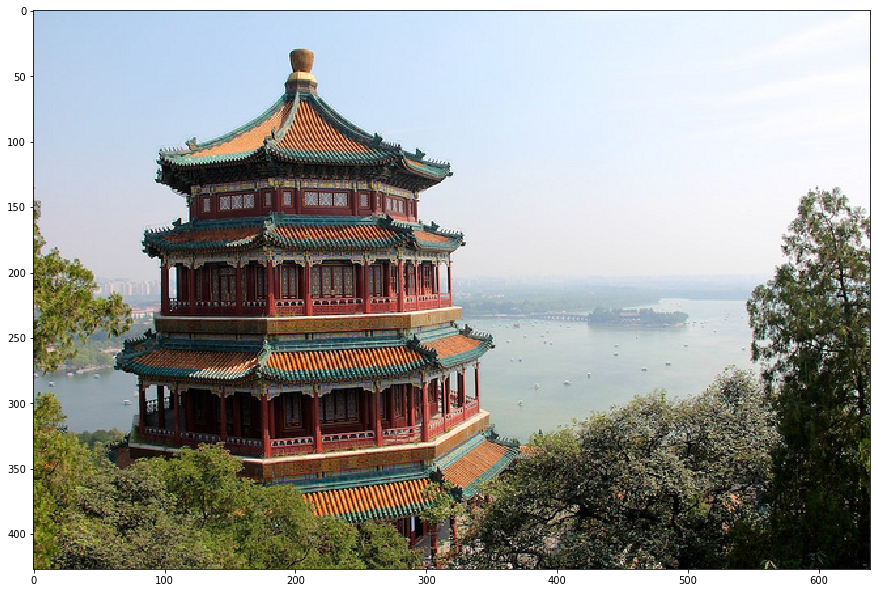

In [7]:
plt.figure(figsize = (15,15))
plt.imshow(china) 
#we use imshow with "china" b/c imshow only accept 3D image type

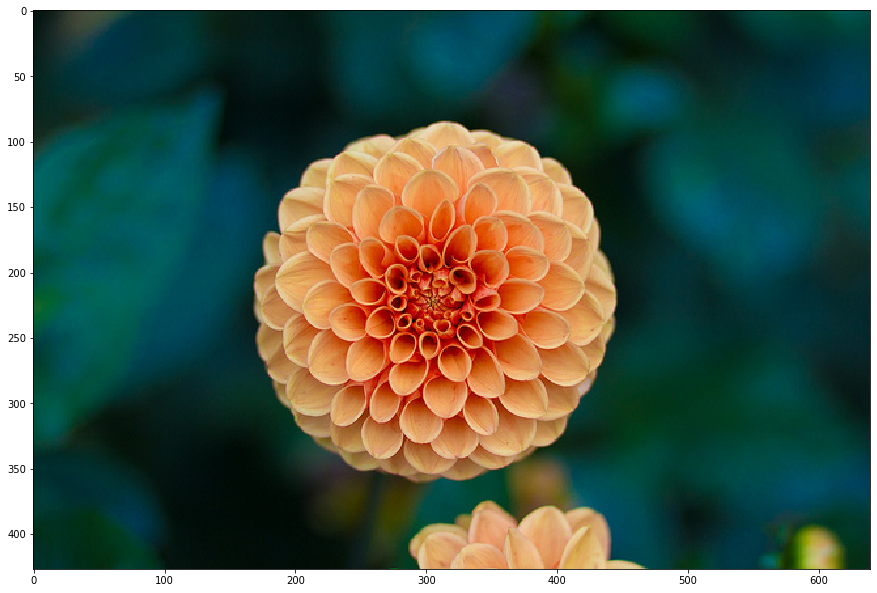

In [8]:
#check another image in load_samples
flower = load_sample_image("flower.jpg")

plt.figure(figsize = (15,15))
plt.imshow(flower)

## Goal: 
Our goal is to compress 90,000 single colors into 64 classes, using kmeans methods. Replace the original sample with 64 clusters of centroid without losing the original quality.

### 1. Determine the hyperparameters of the image preprocessing
Kmeans does not accept 3D arrays as feature matrices, so data preprocessing is required.

In [9]:
n_clusters = 64

china = np.array(china, dtype=np.float64) / china.max()
# imshow performs well on floating point Numbers, so we convert the image data 
# to floating point numbers and compress it to range [0,1]



# Convert image format to matrix format
w, h, d = original_shape = tuple(china.shape) #length, width, pixel
assert d == 3, "one box has features not equal to 3"   
#assert is similar to raise error if not，means："raise Error if not True"

image_array = np.reshape(china, (w*h, d)) #change structure 3D -> 2D
#reshape(object, new shape, order="c")

In [10]:
(china < 0).sum() #check 

0

### 2.Vector quantization of data: modeling

In [11]:
#first, use 1000 samples to find the centroid
image_array_sample = shuffle(image_array, random_state = 0)[:1000]
#shuffle 1000 samples from image_array and shuffle. 

kmeans = KMeans(n_clusters = n_clusters, random_state = 0).fit(image_array_sample)
kmeans.cluster_centers_ #(64, 3) array

array([[0.11798806, 0.11884058, 0.07007673],
       [0.80874811, 0.82262443, 0.85671192],
       [0.47614379, 0.46895425, 0.27124183],
       [0.92831097, 0.95803234, 0.99566563],
       [0.52      , 0.5254902 , 0.39529412],
       [0.61895425, 0.67712418, 0.70816993],
       [0.31198257, 0.34030501, 0.18954248],
       [0.82923351, 0.90641711, 0.98743316],
       [0.80392157, 0.53006536, 0.3751634 ],
       [0.25202614, 0.23764706, 0.20104575],
       [0.03328773, 0.02836297, 0.01732786],
       [0.3454902 , 0.1854902 , 0.12470588],
       [0.52156863, 0.49150327, 0.52592593],
       [0.74457516, 0.83934641, 0.95045752],
       [0.72941176, 0.35764706, 0.23137255],
       [0.41470588, 0.44656863, 0.40980392],
       [0.96176471, 0.77058824, 0.63039216],
       [0.69019608, 0.74705882, 0.7605042 ],
       [0.57019608, 0.41098039, 0.34588235],
       [0.93630422, 0.93594771, 0.94913844],
       [0.3875817 , 0.45620915, 0.10588235],
       [0.56684492, 0.62388592, 0.64171123],
       [0.

In [12]:
#after I find the centroid, do the clustering based on exist centroid
labels = kmeans.predict(image_array)
labels.shape

(273280,)

In [13]:
labels # 1-D array, from 1 to 63

array([63, 63, 63, ..., 31, 35, 35], dtype=int32)

In [15]:
image_kmeans = image_array.copy()

for i in range(w*h):
    image_kmeans[i] = kmeans.cluster_centers_[labels[i]]

In [16]:
image_kmeans.shape #check new image informaton

(273280, 3)

In [18]:
#after dataframe with image_kmeans, there are only 64 clusters in the image
pd.DataFrame(image_kmeans).drop_duplicates().shape 

(64, 3)

In [20]:
#recover image structure: for imshow
image_kmeans = image_kmeans.reshape(w,h,d)
image_kmeans.shape

(427, 640, 3)

### 2.1 Vector quantization at random

In [22]:
#I'm picking the centroid at random
centroid_random = shuffle(image_array, random_state = 0)[:n_clusters]

labels_random = pairwise_distances_argmin(centroid_random, image_array, axis = 0)

#function: pairwise_distances_argmin(x1, x2, axis)     ---- x1，x2 are array
#To calculate the distance between each sample in x2 and each sample point in x1, and to return 
# the index of the nearest sample point in x1 corresponding to the same shape as x2

In [23]:
labels_random.shape

(273280,)

In [24]:
len(set(labels_random))

64

In [25]:
#Replace all the samples with a random centroid
image_random = image_array.copy()

for i in range(w*h):
    image_random[i] = centroid_random[labels_random[i]]

In [26]:
#recover image structure:
image_random = image_random.reshape(w,h,d)
image_random.shape

(427, 640, 3)

image_kmeans is gatering through k-Means, image_random is gatering through random shuffle
let's compaire two differece:

### 3. Visualize original image with Kmeans quantization and random quantization. 

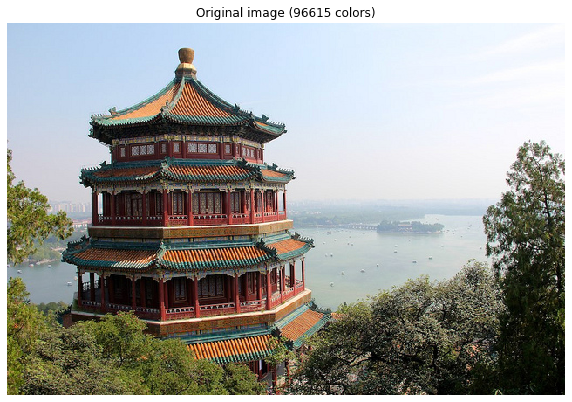

In [27]:
plt.figure(figsize = (10,10))
plt.axis('off')
plt.title('Original image (96615 colors)')
plt.imshow(china)  #original image

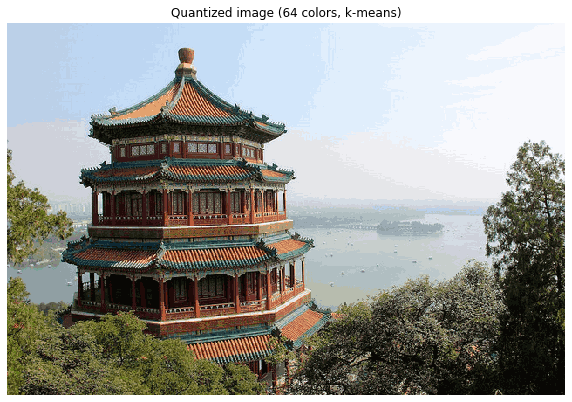

In [28]:
plt.figure(figsize = (10,10))
plt.axis('off')
plt.title('Quantized image (64 colors, k-means)')
plt.imshow(image_kmeans) #KMeans reduced pixels

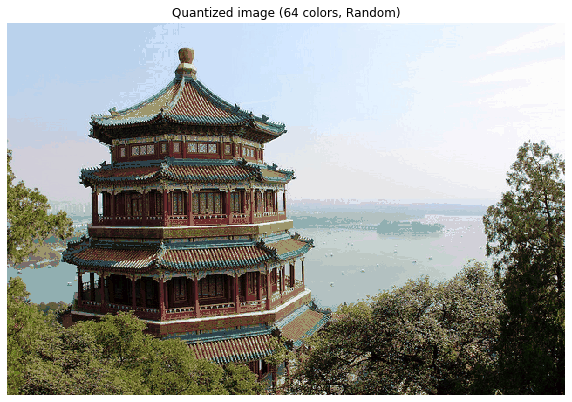

In [29]:
plt.figure(figsize = (10,10))
plt.axis('off')
plt.title('Quantized image (64 colors, Random)')
plt.imshow(image_random) #random clustering